## 	Smith-Waterman local alignment using EMBOSS water.
https://www.ebi.ac.uk/Tools/psa/emboss_water/
citation: Madeira F, Pearce M, Tivey ARN, et al. Search and sequence analysis tools services from EMBL-EBI in 2022. Nucleic Acids Research. 2022 Jul;50(W1):W276-W279. DOI: 10.1093/nar/gkac240. PMID: 35412617; PMCID: PMC9252731.


In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
score_tbl = pd.read_csv("/Genomics/pritykinlab/yanjin/COS551/COS551_Final/data/DNA_seq/align_seq_with_clustw/alignment_score.csv")

In [21]:
score_tbl.head()

,Unnamed: 0,name,score,similarity,length
0,0,Nespas_and_Xist.txt,5556.0,1485/4144 (35.8%),4144
1,1,Gm16084_and_XistAR.txt,1582.0,401/1039 (38.6%),1039
2,2,Gm16084_and_Ube3a.txt,1648.5,400/1029 (38.9%),1029
3,3,Morrbid_and_Nespas.txt,5657.5,1430/3714 (38.5%),3714
4,4,Airn_and_XistAR.txt,7096.5,1783/4649 (38.4%),4649


In [22]:
score_tbl[['name1', 'name2']] = score_tbl['name'].str.split('_and_', expand=True)

# Remove the '.txt' extension from the second name
score_tbl['name2'] = score_tbl['name2'].str.replace('.txt', '', regex=False)

# Extract the percentage using regular expression
score_tbl['percentage'] = score_tbl['similarity'].str.extract(r'(\d+\.\d+)%')

# Convert the extracted percentages to float
score_tbl['percentage'] = score_tbl['percentage'].astype(float)


# Display the DataFrame
score_tbl

,Unnamed: 0,name,score,similarity,length,name1,name2,percentage
0,0,Nespas_and_Xist.txt,5556.0,1485/4144 (35.8%),4144,Nespas,Xist,35.8
1,1,Gm16084_and_XistAR.txt,1582.0,401/1039 (38.6%),1039,Gm16084,XistAR,38.6
2,2,Gm16084_and_Ube3a.txt,1648.5,400/1029 (38.9%),1029,Gm16084,Ube3a,38.9
3,3,Morrbid_and_Nespas.txt,5657.5,1430/3714 (38.5%),3714,Morrbid,Nespas,38.5
4,4,Airn_and_XistAR.txt,7096.5,1783/4649 (38.4%),4649,Airn,XistAR,38.4
...,...,...,...,...,...,...,...,...
61,61,Gm13261_and_Morrbid.txt,2741.5,643/1527 (42.1%),1527,Gm13261,Morrbid,42.1
62,62,Hottip_and_Xist.txt,5788.5,1521/4112 (37.0%),4112,Hottip,Xist,37.0
63,63,Halr1_and_Morrbid.txt,20750.0,5292/13602 (38.9%),13602,Halr1,Morrbid,38.9
64,64,Airn_and_Xist.txt,0.0,0,1,Airn,Xist,NaN


In [23]:
score_tbl.drop(["name","similarity","Unnamed: 0"],axis = 1,inplace = True)
score_tbl

,score,length,name1,name2,percentage
0,5556.0,4144,Nespas,Xist,35.8
1,1582.0,1039,Gm16084,XistAR,38.6
2,1648.5,1029,Gm16084,Ube3a,38.9
3,5657.5,3714,Morrbid,Nespas,38.5
4,7096.5,4649,Airn,XistAR,38.4
...,...,...,...,...,...
61,2741.5,1527,Gm13261,Morrbid,42.1
62,5788.5,4112,Hottip,Xist,37.0
63,20750.0,13602,Halr1,Morrbid,38.9
64,0.0,1,Airn,Xist,NaN


In [24]:
score_tbl["normalized_score"] = score_tbl["score"] / score_tbl["length"]

In [25]:
score = score_tbl[["name1","name2","normalized_score"]]

In [26]:
score

,name1,name2,normalized_score
0,Nespas,Xist,1.340734
1,Gm16084,XistAR,1.522618
2,Gm16084,Ube3a,1.602041
3,Morrbid,Nespas,1.523290
4,Airn,XistAR,1.526457
...,...,...,...
61,Gm13261,Morrbid,1.795350
62,Hottip,Xist,1.407709
63,Halr1,Morrbid,1.525511
64,Airn,Xist,0.000000


In [28]:
heatmap_data = score.pivot(index='name1', columns='name2', values='normalized_score')

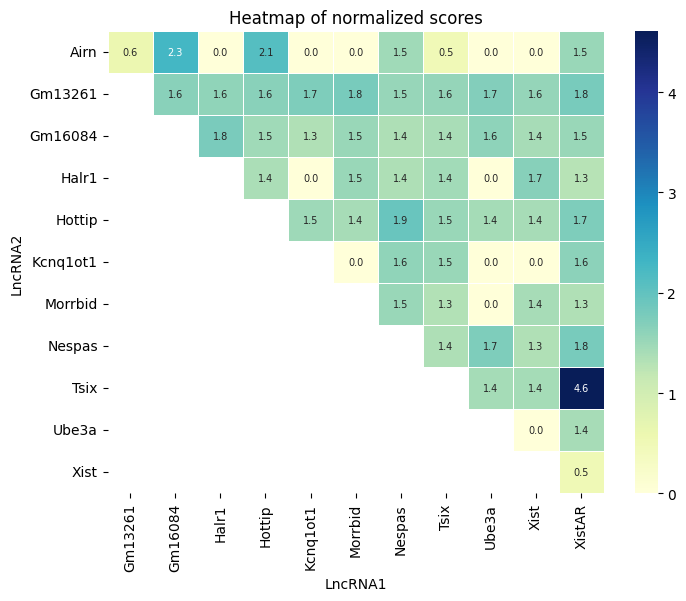

In [29]:
plt.figure(figsize=(8, 6))

# Draw the heatmap
sns.heatmap(heatmap_data, annot=True, fmt=".1f", linewidths=.5, cmap="YlGnBu", annot_kws={"size": 7})

# Add titles and labels as needed
plt.title('Heatmap of normalized scores')
plt.xlabel('LncRNA1')
plt.ylabel('LncRNA2')

# Show the plot
plt.show()

In [33]:
score_tbl = score_tbl.fillna(0)


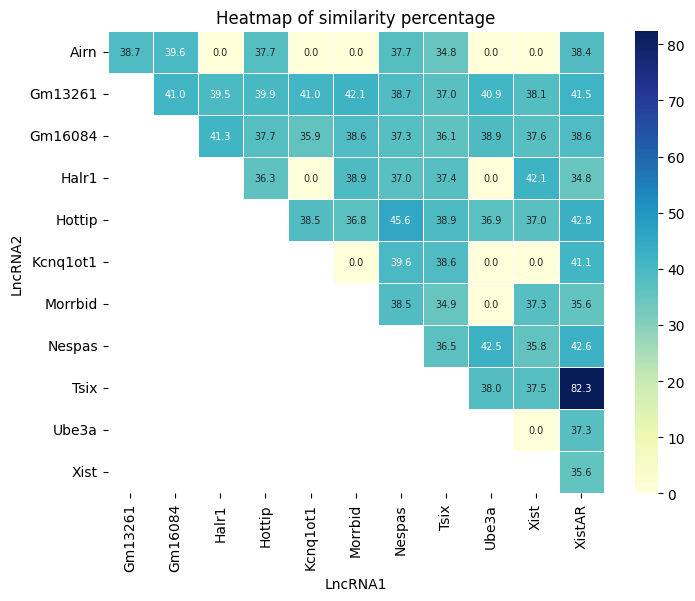

In [34]:
percentage = score_tbl[["name1","name2","percentage"]]
heatmap_data = percentage.pivot(index='name1', columns='name2', values='percentage')
plt.figure(figsize=(8, 6))

# Draw the heatmap
sns.heatmap(heatmap_data, annot=True, fmt=".1f", linewidths=.5, cmap="YlGnBu", annot_kws={"size": 7})

# Add titles and labels as needed
plt.title('Heatmap of similarity percentage')
plt.xlabel('LncRNA1')
plt.ylabel('LncRNA2')

# Show the plot
plt.show()

In [2]:
from Bio import pairwise2
alignments = pairwise2.align.globalxx("ACCGT", "ACG")

/Genomics/argo/users/yc0901/.conda/envs/bioenv/lib/python3.10/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


In [64]:
alignments[0].score

3.0

In [3]:
from Bio.pairwise2 import format_alignment
print(format_alignment(*alignments[0]))

ACCGT
| || 
A-CG-
  Score=3



In [ ]:
def read_fasta(fasta_file):
    with open(fasta_file, 'r') as file:
        header = None
        sequence = ''
        for line in file:
            line = line.strip()
            if line.startswith('>'):
                if header:
                    yield (header, sequence)
                header = line[1:]  # Remove '>'
                sequence = ''
            else:
                sequence += line
        yield (header, sequence)

fasta_file = '/Genomics/pritykinlab/yanjin/COS551/COS551_Final/data/DNA_seq/combined.fa'
fasta_dict = {}
for header, sequence in read_fasta(fasta_file):
    fasta_dict[header] = sequence

header_list = []
for header, sequence in read_fasta(fasta_file):
    header_list.append(header)

for i in range(5,6):
    for j in range(10,len(header_list)):
        alignments = pairwise2.align.localxx(fasta_dict[header_list[i]], fasta_dict[header_list[j]])
        print(header_list[i],header_list[j],alignments[0].score)


In [71]:
len(fasta_dict[header_list[5]])

93092

In [72]:
len(fasta_dict[header_list[9]])

83987

In [1]:
header_list[9]

NameError: name 'header_list' is not defined

In [ ]:
alignments = pairwise2.align.localxx(fasta_dict[header_list[0]], fasta_dict[header_list[9]])
alignments[0].score

In [55]:
alignments = pairwise2.align.localxx(fasta_dict[header_list[0]], fasta_dict[header_list[6]])

In [56]:
alignments[0].score

4316.0

In [57]:
alignments = pairwise2.align.localxx(fasta_dict[header_list[0]], fasta_dict[header_list[7]])

In [58]:
alignments[0].score

2263.0

In [ ]:
alignments = pairwise2.align.localxx(fasta_dict[header_list[0]], fasta_dict[header_list[8]])

In [ ]:
alignments = pairwise2.align.localxx(fasta_dict[header_list[0]], fasta_dict[header_list[5]])
alignments[0].score

In [ ]:
alignments = pairwise2.align.localxx(fasta_dict[header_list[0]], fasta_dict[header_list[5]])
alignments[0].score

In [51]:
header_list = []
for header, sequence in read_fasta(fasta_file):
    header_list.append(header)

for i in range(0,len(header_list)-1):
    for j in range(1,len(header_list)):
        alignments = pairwise2.align.localxx(fasta_dict[header_list[i]], fasta_dict[header_list[j]])
        print(header_list[i],header_list[j],alignments[0].score)


Airn_ensembl|17dna:chromosome|chromosome:GRCm39:17:12959598:13079623:1 ENSMUST00000137351.2|ENSMUSG00000086748.2|OTTMUSG00000011193.1|OTTMUST00000026270.1|Gm13261-201|Gm13261|1020| 1020.0
Airn_ensembl|17dna:chromosome|chromosome:GRCm39:17:12959598:13079623:1 ENSMUST00000148122.2|ENSMUSG00000086060.2|OTTMUSG00000030010.1|OTTMUST00000074421.1|Gm16084-201|Gm16084|620| 620.0
Airn_ensembl|17dna:chromosome|chromosome:GRCm39:17:12959598:13079623:1 Halr1_ensembl|6dna:chromosome|chromosome:GRCm39:6:52079303:52092577:1 13275.0
Airn_ensembl|17dna:chromosome|chromosome:GRCm39:17:12959598:13079623:1 ENSMUST00000152875.2|ENSMUSG00000055408.8|OTTMUSG00000018874.1|OTTMUST00000045398.1|Hottip-202|Hottip|2325| 2325.0


MemoryError: Out of memory